# Notes on Chapter 2

Thsi contains information about numpy arrays that I didn't know. 

## Numpy arrays

Let's import numpy and start using it:

In [1]:
import numpy

Unlike lists Numpy arrays are contrained to have all the elements of the same type.  If the types don't match, Numpy will try to upcast. For example, here integers are upcast to floating points.

In [2]:
numpy.array([3.14, 4, 2, 3])

array([ 3.14,  4.  ,  2.  ,  3.  ])

If we want to set the data type to a specific type, we use the `dtype` keyword:

In [3]:
numpy.array([1, 2, 3, 4], dtype='float32')

array([ 1.,  2.,  3.,  4.], dtype=float32)

Numpy array can be multidimensional while lists can't. We can generate multi-dimensional arrays also by passing nested list to numpy array. 

In [4]:
numpy.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

## Subarrays as no copy views

It's important to know that array slices return a "views" of the array rather than copies (this happen in lists). For example:

In [5]:
x2 = numpy.random.randint(10, size=(3, 4))  # Two-dimensional array
print(x2)

[[8 6 7 0]
 [8 1 5 3]
 [3 8 8 1]]


In [6]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[8 6]
 [8 1]]


Now let's see what happen when we modify the subarray:

In [7]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99  6]
 [ 8  1]]


In [8]:
print(x2)

[[99  6  7  0]
 [ 8  1  5  3]
 [ 3  8  8  1]]


As you can see the original array has been modified. If we want to avoid this beahaviour, we need to create copies of the array by using the `copy()` method.

In [9]:
#Create a copy
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  6]
 [ 8  1]]


In [10]:
#Modify the copy of the subarray
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

[[42  6]
 [ 8  1]]


In [11]:
#We observe no changes in the original one
print(x2)

[[99  6  7  0]
 [ 8  1  5  3]
 [ 3  8  8  1]]


## Different ways of reshape arrays

In [12]:
#put numbers from 1-9 in a 3x3 matrix
grid = numpy.arange(1, 10).reshape((3, 3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [13]:
x = numpy.array([1, 2, 3])

# row vector via reshape
x.reshape((1, 3))

array([[1, 2, 3]])

In [14]:
# row vector via newaxis
x[numpy.newaxis, :]

array([[1, 2, 3]])

In [15]:
# column vector via reshape
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [16]:
# column vector via newaxis
x[:, numpy.newaxis]

array([[1],
       [2],
       [3]])

## About concatenation of arrays

We will use `numpy.concatenate`, `numpy.vstack`, and `numpy.hstack`. 

In [17]:
x = numpy.array([1, 2, 3])
y = numpy.array([3, 2, 1])

In [18]:
#Concatenate 2 arrays,
#Note: we can concatenate more than 2 at the same time
numpy.concatenate([x,y])

array([1, 2, 3, 3, 2, 1])

In [19]:
#We can also use with 2d arrays
grid = numpy.array([[1, 2, 3],
                 [4, 5, 6]])

numpy.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [20]:
#If we want to concatenate along the sencond axis we do:
numpy.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

If we want to stack array form different dimensions, we can use the stack functions. For example:

In [21]:
x = numpy.array([1, 2, 3])
grid = numpy.array([[9, 8, 7],
                   [6, 5, 4]])

# vertically stack the arrays
numpy.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [22]:
# horizontally stack the arrays
y = numpy.array([[99],
                [99]])
numpy.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

## Splitting of arrays

For documentation on `numpy.split()` got to this [link](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.split.html). 

In [23]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = numpy.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


The [3,5] in the second argument, indicates that the arrays will be splitted as:

* ary[:3]
* ary[3:5]
* ary[5:]

Note that if we have N split-points, we will have N+1 subarrays. Other similar functions are `numpy.hsplit` and `numpy.vsplit`. For example:

In [24]:
#Let's defined a grid that we will split
grid = numpy.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

`vsplit` is equivalent to split with `axis=0` (default), the array is always split along the first axis regardless of the array dimension.

In [25]:
upper, lower = numpy.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


More documentation on `vsplit` can be find in this [link](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.vsplit.html#numpy.vsplit)


`hsplit` is equivalent to split with `axis=1`, the array is always split along the second axis regardless of the array dimension.

In [26]:
left, right = numpy.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


More documentation on `hsplit` can be find in this [link](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.hsplit.html#numpy.hsplit)

## Cool features of numpy ufunc

### Specifying output

Some times is useful to specify the array where we want to store the result of the calculation. We can use this to write results to the memory location where we like them to be, instead of creating a temporary array. This work better for really big arrays, ie it's more efficient for big arrays, otherwise we don't see a speedup. 

In [27]:
x = numpy.random.rand(100000000)

In [28]:
%%timeit
y = x*5

1 loop, best of 3: 899 ms per loop


In [29]:
z = numpy.zeros(100000000)

In [30]:
%%timeit 
numpy.multiply(x, 5, out=z)

1 loop, best of 3: 562 ms per loop


Other example of saving output is:

In [31]:
x = numpy.arange(5)
y = numpy.zeros(10)
numpy.power(2, x, out=y[::2])
print(y)

[  1.   0.   2.   0.   4.   0.   8.   0.  16.   0.]


### Aggregates

For binnary functions, some aggregates can be computed from the object. For example, reducing and array by using the `reduce` method of any `ufunc` ([`numpy.ufunc.reduce`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ufunc.reduce.html)). A reduce repeatedly applies a given operation to the elements of an array until only a single result remains.

In [32]:
x = numpy.arange(1,6)
numpy.add.reduce(x)

15

In [33]:
numpy.multiply.reduce(x)

120

If we want to store the intermediate steps, we use [`accumulate`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ufunc.accumulate.html) instead of `reduce`

In [34]:
numpy.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [35]:
numpy.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

### Outer product

How to generate the output of all pairs of two different inputs. 

In [36]:
numpy.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

**Note**

"The axis keyword specifies the dimension of the array that will be collapsed, rather than the dimension that will be returned. So specifying axis=0 means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated." (From the book PDSH)

For example:

In [37]:
M = numpy.random.random((3, 4))
print(M)

[[ 0.02876983  0.30731354  0.60241932  0.40489011]
 [ 0.79940223  0.61888683  0.13600673  0.64382689]
 [ 0.01824219  0.73235375  0.05290634  0.0461922 ]]


In [38]:
# Find the minimum value within each column by specifying axis=0:
M.min(axis=0)

array([ 0.01824219,  0.30731354,  0.05290634,  0.0461922 ])

In [39]:
# Find the maximum value within each column by specifying axis=1
M.max(axis=1)

array([ 0.60241932,  0.79940223,  0.73235375])

## Example: usefulness of Numpy aggregates

In this case we will explore some data and we will use some numpy functions to have a better idea of what is going on. The example consists in analyzing the president heights. 

In [40]:
#Let's peak the data and see how it looks
!head -5 ../notebooks/data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189
4,James Madison,163


We will use `pandas` now but we will see in the next chapter this library in more detail.  

In [41]:
import pandas
data = pandas.read_csv('../notebooks/data/president_heights.csv')

In [42]:
type(data)

pandas.core.frame.DataFrame

In [43]:
#Uncomment the next line to see how it looks
#data

In [44]:
heights = numpy.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Now that we have an array we can compute some things on it, like for example:

In [45]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.738095238
Standard deviation: 6.93184344275
Minimum height:     163
Maximum height:     193


If we want to know more about the distribution we can calculate some more info like:

In [46]:
print("25th percentile:   ", numpy.percentile(heights, 25))
print("Median:            ", numpy.median(heights))
print("75th percentile:   ", numpy.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


Note: percentil x means that x amount of the values are below and the rest above. For example the for the 25th percentil, we have that 25% of the heights are under 174.25 and the rest are above. The median is the value separating the higher half of a data.

To have a better idea we will plot this data.

In [47]:
from matplotlib import pyplot
import seaborn; seaborn.set() #set plot style
%matplotlib inline

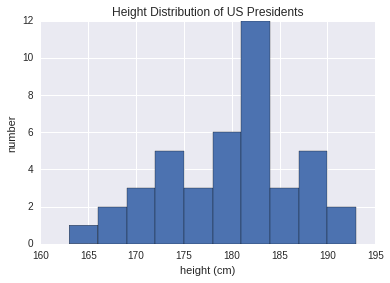

In [48]:
pyplot.hist(heights)
pyplot.title('Height Distribution of US Presidents')
pyplot.xlabel('height (cm)')
pyplot.ylabel('number');